<a href="https://colab.research.google.com/github/DrumilHV/Mit-Labs/blob/main/sem6/DL-LAB/midsem/midsem_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

cpu


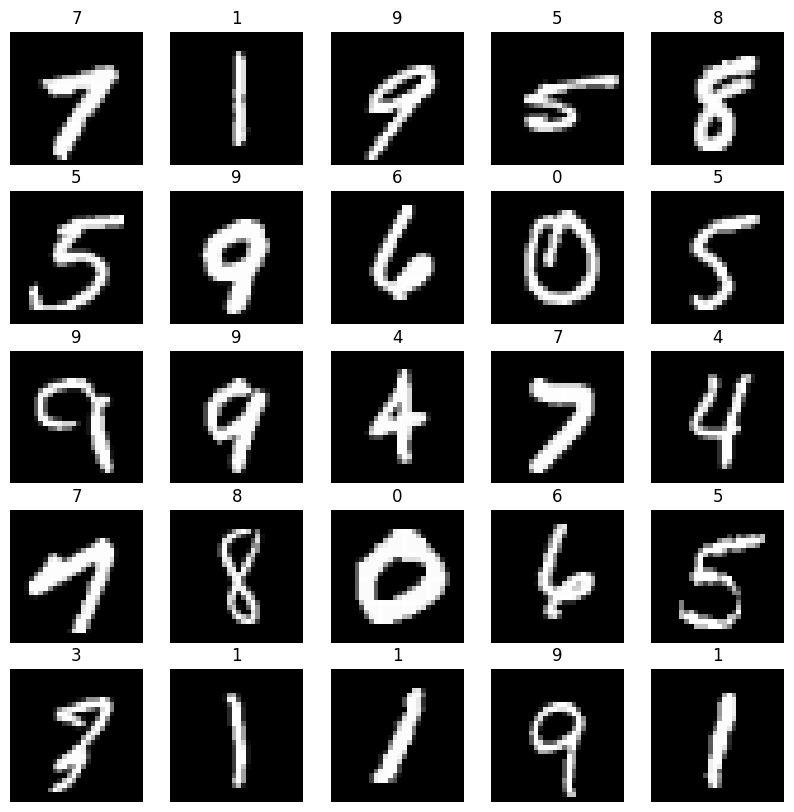

TypeError: 'MNIST' object cannot be interpreted as an integer

In [10]:
import torch, torch.nn as nn, torchvision , torchvision.datasets as datasets, torch.nn.functional as F
from torchvision.transforms import ToTensor
from torch import optim
from torch.utils.data import Dataset
device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

train_data = datasets.MNIST(
    root = 'data',
    train=True,
    download = True,
    transform  = ToTensor()
)
test_data = datasets.MNIST(
    root = 'data',
    train=False,
    download = True,
    transform  = ToTensor()
)




import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,10))

row , col = 5 , 5

for i in range(1, row*col+1):
  sample = torch.randint(len(train_data), size=(1,)).item()
  img , lable = train_data[sample]
  figure.add_subplot(row, col, i)
  plt.title(lable)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.net = nn.Sequential(
        nn.Conv2d(1,64, 3),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride=2),
        nn.Conv2d(64,128, 3),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride=2),
        nn.Conv2d(128,64, 3),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride=2),
    )
    self.classification = nn.Sequential(
        nn.Linear(64,20,bias=True),
        nn.ReLU(),
        nn.Linear(20,10, bias=True)
    )

  def forward(self, x):
    features = self.net(x)
    return self.classification(features.view(100,-1))

def generateGaussin(tindx):
  return torch.noraml(tindx[0], tindx[1], (1,28,28))

class MyDataSet(Dataset):
  def __init__(self, n):
    classes = {0: (0.5,2), 1: (1, 2.5)}
    self.y = [torch.round(torch.rand(1))[0].long() for i in range(n)]
    self.X = [generateGaussin(classes[self.y[i].item()]) for i in range(n)]

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

  def __len__(self):
    return len(self.X)

from torch.utils.data import DataLoader
test_data = MyDataSet(test_data)
train_data = MyDataSet(train_data)
test_loader = DataLoader(test_data, batch_size=4, shuffle = True, num_workers= 1);
train_loader = DataLoader(train_data, batch_size=4, shuffle = True, num_workers= 1);

cnn = CNN().to(device)
loss_func = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(cnn.parameters(), lr=0.001)
sum(p.numel() for p in cnn.parameters())
losses = []
for j in range(5):
  running_loss = 0.0
  for i , data in enumerate(train_loader):
    img, labels = data[0].to(device), data[1].to(device)
    optimizer.zero_grad()
    output = cnn(img)
    loss = loss_func(output, labels)
    optimizer.step()
    loss.backward()
    running_loss+=loss.item()
    if(i%100 == 99):
      print(f'epoch {j} , iter {i} ,loss {running_loss/100}')
      running_loss = 0.0


total, correct = 0,0
for j , data in enumerate(test_loader):
  img, labels = data[0].to(device), data[1].to(device)
  op = cnn(img)
  _, pred = torch.max(op, 1)
  total += labels.size(0)
  correct+= (pred == labels).sum()
print(f'correct: {correct}, total: {total}, accuracy: {correct/total}')


checkpoint = {
            "last_loss": 2.3,
            "last_epoch": 5,
            "model_state": cnn.state_dict(),
            "optimizer_state": optimizer.state_dict(),
        }
torch.save(checkpoint, 'model.pt')


In [11]:
import torch, torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torch import optim
from torch.utils.data import Dataset, DataLoader
device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

train_data = datasets.MNIST(
    root = 'data',
    train=True,
    download = True,
    transform  = ToTensor()
)
test_data = datasets.MNIST(
    root = 'data',
    train=False,
    download = True,
    transform  = ToTensor()
)



cpu


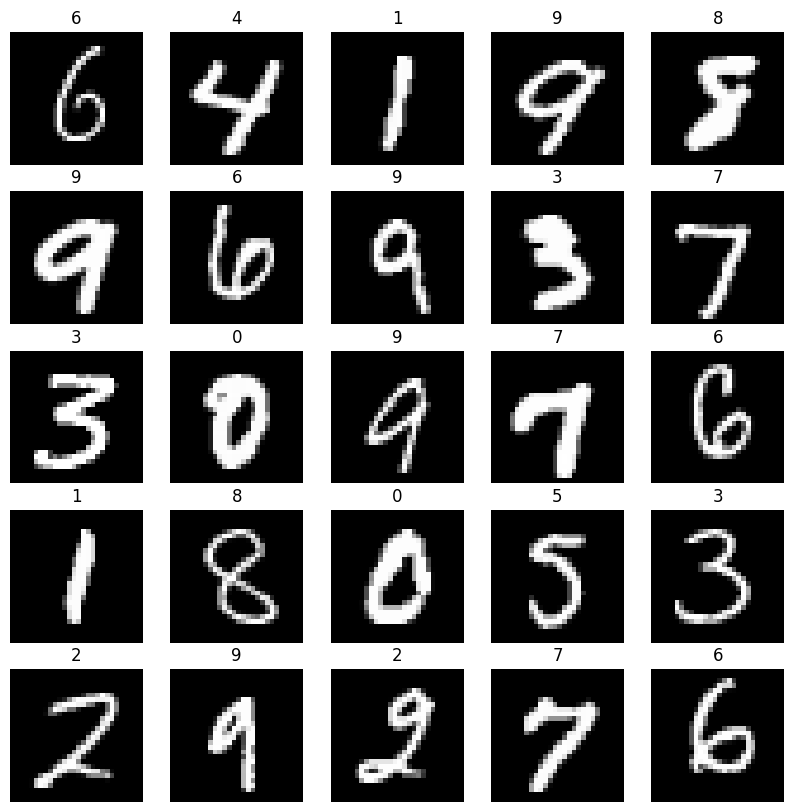

In [12]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,10))

row , col = 5 , 5

for i in range(1, row*col+1):
  sample = torch.randint(len(train_data), size=(1,)).item()
  img , lable = train_data[sample]
  figure.add_subplot(row, col, i)
  plt.title(lable)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [28]:
import torch
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.net = nn.Sequential(
        nn.Conv2d(1,64, 3),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride=2),
        nn.Conv2d(64,128, 3),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride=2),
        nn.Conv2d(128,64, 3),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride=2),
    )
    self.classification = nn.Sequential(
        nn.Linear(64,20,bias=True),
        nn.ReLU(),
        nn.Linear(20,10, bias=True)
    )

  def forward(self, x):
    features = self.net(x)
    return self.classification(features.view(100,-1))

def generateGaussin(tindx):
  return torch.noraml(tindx[0], tindx[1], (1,28,28))

class MyDataSet(Dataset):
  def __init__(self, n):
    classes = {0: (0.5,2), 1: (1, 2.5)}
    self.y = [torch.round(torch.rand(1))[0].long() for i in range(n)]
    self.X = [generateGaussin(classes[self.y[i].item()]) for i in range(n)]

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

  def __len__(self):
    return len(self.X)


In [34]:
from torch.utils.data import DataLoader
import torch
# model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=True)
# model.eval()
# print(model.eval())

train_data = MyDataSet(1000)
test_data = MyDataSet(200)

test_loader = DataLoader(test_data, batch_size=1000, shuffle = True, num_workers= 1);
train_loader = DataLoader(train_data, batch_size=200, shuffle = True, num_workers= 1);

cnn = CNN().to(device)
loss_func = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(cnn.parameters(), lr=0.001)
sum(p.numel() for p in cnn.parameters())
losses = []

AttributeError: module 'torch' has no attribute 'noraml'

In [32]:
total, correct = 0,0

for j in range(5):
  running_loss = 0.0
  for i , data in enumerate(train_loader):
    img, labels = data[0].to(device), data[1].to(device)
    optimizer.zero_grad()
    output = cnn(img)
    loss = loss_func(output, labels)
    optimizer.step()
    loss.backward()
    running_loss+=loss.item()
    if(i%100 == 99):
      print(f'epoch {j} , iter {i} ,loss {running_loss/100}')
      running_loss = 0.0

print(f'correct: {correct}, total: {total}, accuracy: {correct/total}')


total, correct = 0,0
for j , data in enumerate(test_loader):
  img, labels = data[0].to(device), data[1].to(device)
  op = cnn(img)
  _, pred = torch.max(op, 1)
  total += labels.size(0)
  correct+= (pred == labels).sum()
print(f'test set: \ncorrect: {correct}, total: {total}, accuracy: {correct/total}')

total, correct = 0,0
for j , data in enumerate(train_loader):
  img, labels = data[0].to(device), data[1].to(device)
  op = cnn(img)
  _, pred = torch.max(op, 1)
  total += labels.size(0)
  correct+= (pred == labels).sum()
print(f'train set: \ncorrect: {correct}, total: {total}, accuracy: {correct/total}')


checkpoint = {
            "last_loss": 2.3,
            "last_epoch": 5,
            "model_state": cnn.state_dict(),
            "optimizer_state": optimizer.state_dict(),
        }
torch.save(checkpoint, 'model.pt')

RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x128 and 64x20)

cpu


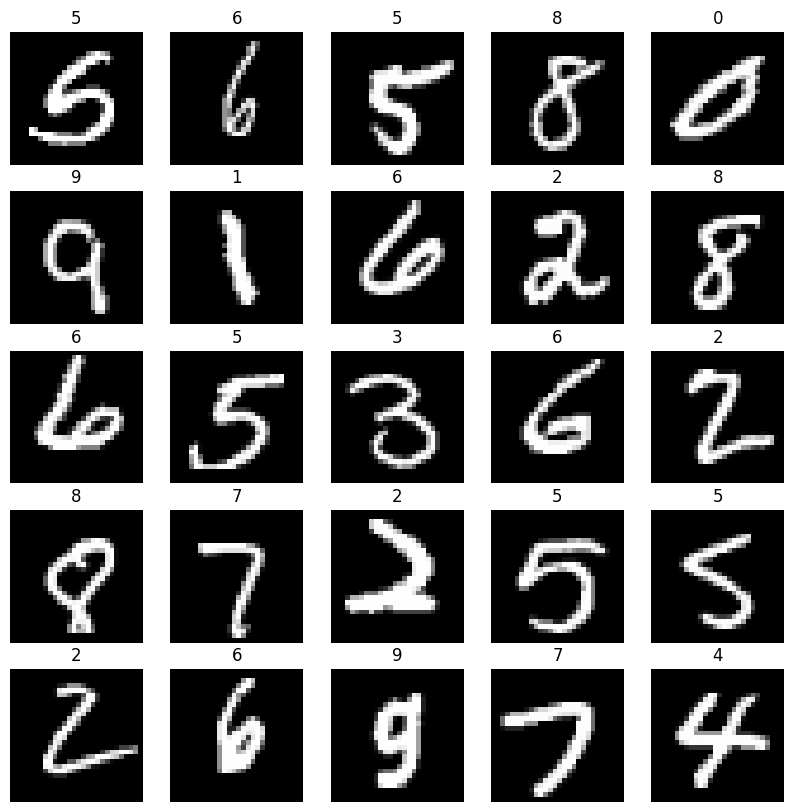

epoch 0 , iter 99 ,loss 2.3079973673820495
epoch 0 , iter 199 ,loss 2.309611074924469
epoch 0 , iter 299 ,loss 2.3072884583473208
epoch 0 , iter 399 ,loss 2.3091527891159056
epoch 0 , iter 499 ,loss 2.3078925943374635
epoch 0 , iter 599 ,loss 2.307768716812134
correct: 892, total: 10000, accuracy: 0.08919999748468399


In [5]:
import torch, torch.nn as nn, torchvision , torchvision.datasets as datasets, torch.nn.functional as F
from torchvision.transforms import ToTensor
from torch import optim
device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

train_data = datasets.MNIST(
    root = 'data',
    train=True,
    download = True,
    transform  = ToTensor()
)
test_data = datasets.MNIST(
    root = 'data',
    train=False,
    download = True,
    transform  = ToTensor()
)
from torch.utils.data import DataLoader
test_loader = DataLoader(test_data, batch_size=100, shuffle = True, num_workers= 1);
train_loader = DataLoader(train_data, batch_size=100, shuffle = True, num_workers= 1);
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,10))

row , col = 5 , 5

for i in range(1, row*col+1):
  sample = torch.randint(len(train_data), size=(1,)).item()
  img , lable = train_data[sample]
  figure.add_subplot(row, col, i)
  plt.title(lable)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.net = nn.Sequential(
        nn.Conv2d(1,64, 3),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride=2),
        nn.Conv2d(64,128, 3),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride=2),
        nn.Conv2d(128,64, 3),
        nn.ReLU(),
        nn.MaxPool2d((2,2), stride=2),
    )
    self.classification = nn.Sequential(
        nn.Linear(64,20,bias=True),
        nn.ReLU(),
        nn.Linear(20,10, bias=True)
    )

  def forward(self, x):
    features = self.net(x)
    return self.classification(features.view(100,-1))

cnn = CNN().to(device)
loss_func = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(cnn.parameters(), lr=0.001)
sum(p.numel() for p in cnn.parameters())
losses = []
for j in range(1):
  running_loss = 0.0
  for i , data in enumerate(train_loader):
    img, labels = data[0].to(device), data[1].to(device)
    optimizer.zero_grad()
    output = cnn(img)
    loss = loss_func(output, labels)
    optimizer.step()
    loss.backward()
    running_loss+=loss.item()
    if(i%100 == 99):
      print(f'epoch {j} , iter {i} ,loss {running_loss/100}')
      running_loss = 0.0


total, correct = 0,0
for j , data in enumerate(test_loader):
  img, labels = data[0].to(device), data[1].to(device)
  op = cnn(img)
  _, pred = torch.max(op, 1)
  total += labels.size(0)
  correct+= (pred == labels).sum()
print(f'correct: {correct}, total: {total}, accuracy: {correct/total}')


checkpoint = {
            "last_loss": 2.0,
            "last_epoch": 1,
            "model_state": cnn.state_dict(),
            "optimizer_state": optimizer.state_dict(),
        }
torch.save(checkpoint, 'model.pt')
# or save the model insted of of checkpoint
#  torch.save(cnn, 'model.pt')
# remember same names for the class and its componnets and same optimizer



In [6]:
import PIL.Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import glob
import torchvision
import torchvision.transforms as transform
from torchvision.models import AlexNet_Weights
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets

class CNNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1, 64, 3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2, 2), stride=2),
                                 nn.Conv2d(64, 128, 3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2, 2), stride=2),
                                 nn.Conv2d(128, 64, 3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2, 2), stride=2),
                                 )
        self.classification = nn.Sequential(nn.Linear(64, 20, bias=True),
                                                 nn.ReLU(),
                                                 nn.Linear(20, 10, bias=True), )

    def forward(self, x):
        features = self.net(x)
        return self.classification(features.view(batch_size, -1))


batch_size=4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNClassifier().to(device)

check_point = torch.load('model.pt')
model.load_state_dict(checkpoint["model_state"])

mnist_trainset = datasets.FashionMNIST(root='./data', train=False,download=True, transform = ToTensor())
train_loader = DataLoader(mnist_trainset, batch_size=batch_size, shuffle=False)
mnist_testset = datasets.FashionMNIST(root='./data', train=False,download=True, transform = ToTensor())
test_loader = DataLoader(mnist_testset, batch_size=batch_size, shuffle=False)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
optimizer.load_state_dict(checkpoint["optimizer_state"])
loss = checkpoint["last_loss"]
epoch = checkpoint["last_epoch"]
# optimizer = optim.Adam(cnn.parameters(), lr=0.001)


NEW_EPOCHS = 2
for epoch in range(NEW_EPOCHS):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

correct, total = 0, 0
for i, vdata in enumerate(test_loader):
    tinputs, tlabels = vdata[0].to(device), vdata[1].to(device)
    toutputs = model(tinputs)
    _, predicted = torch.max(toutputs, 1)
    total += tlabels.size(0)
    correct += (predicted == tlabels).sum()
print(f"Correct = {correct}, Total = {total}")
accuracy = 100.0 * correct / total
print("The overall accuracy is {} %".format(accuracy))

100%|██████████| 26421880/26421880 [00:00<00:00, 118726695.25it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 6981439.35it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 65975548.97it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


100%|██████████| 5148/5148 [00:00<00:00, 13428032.96it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

[1,   100] loss: 2.179
[1,   200] loss: 1.720
[1,   300] loss: 1.297
[1,   400] loss: 1.070
[1,   500] loss: 1.018
[1,   600] loss: 0.851
[1,   700] loss: 0.883
[1,   800] loss: 0.984
[1,   900] loss: 0.901
[1,  1000] loss: 0.906
[1,  1100] loss: 0.753
[1,  1200] loss: 0.664
[1,  1300] loss: 0.763
[1,  1400] loss: 0.754
[1,  1500] loss: 0.701
[1,  1600] loss: 0.733
[1,  1700] loss: 0.740
[1,  1800] loss: 0.642
[1,  1900] loss: 0.680
[1,  2000] loss: 0.664
[1,  2100] loss: 0.707
[1,  2200] loss: 0.689
[1,  2300] loss: 0.687
[1,  2400] loss: 0.697
[1,  2500] loss: 0.606
Correct = 7459, Total = 10000
The overall accuracy is 74.58999633789062 %


In [7]:
import PIL.Image
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader
import glob
import torchvision
import torchvision.transforms as transform
from torchvision.models import AlexNet_Weights
from torchvision.transforms import ToTensor
import torchvision.datasets as datasets

class CNNClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Conv2d(1, 64, 3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2, 2), stride=2),
                                 nn.Conv2d(64, 128, 3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2, 2), stride=2),
                                 nn.Conv2d(128, 64, 3),
                                 nn.ReLU(),
                                 nn.MaxPool2d((2, 2), stride=2),
                                 )
        self.classification = nn.Sequential(nn.Linear(64, 20, bias=True),
                                                 nn.ReLU(),
                                                 nn.Linear(20, 10, bias=True), )

    def forward(self, x):
        features = self.net(x)
        return self.classification(features.view(batch_size, -1))


batch_size=4
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNNClassifier().to(device)

check_point = torch.load('model.pt')
model.load_state_dict(checkpoint["model_state"])

mnist_trainset = datasets.FashionMNIST(root='./data', train=False,download=True, transform = ToTensor())
train_loader = DataLoader(mnist_trainset, batch_size=batch_size, shuffle=False)
mnist_testset = datasets.FashionMNIST(root='./data', train=False,download=True, transform = ToTensor())
test_loader = DataLoader(mnist_testset, batch_size=batch_size, shuffle=False)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
optimizer.load_state_dict(checkpoint["optimizer_state"])
loss = checkpoint["last_loss"]
epoch = checkpoint["last_epoch"]
# optimizer = optim.Adam(cnn.parameters(), lr=0.001)


NEW_EPOCHS = 2
for epoch in range(NEW_EPOCHS):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

correct, total = 0, 0
for i, vdata in enumerate(test_loader):
    tinputs, tlabels = vdata[0].to(device), vdata[1].to(device)
    toutputs = model(tinputs)
    _, predicted = torch.max(toutputs, 1)
    total += tlabels.size(0)
    correct += (predicted == tlabels).sum()
print(f"Correct = {correct}, Total = {total}")
accuracy = 100.0 * correct / total
print("The overall accuracy is {} %".format(accuracy))

[1,   100] loss: 2.179
[1,   200] loss: 1.720
[1,   300] loss: 1.297
[1,   400] loss: 1.070
[1,   500] loss: 1.018
[1,   600] loss: 0.851
[1,   700] loss: 0.883
[1,   800] loss: 0.984
[1,   900] loss: 0.901
[1,  1000] loss: 0.906
[1,  1100] loss: 0.753
[1,  1200] loss: 0.664
[1,  1300] loss: 0.763
[1,  1400] loss: 0.754
[1,  1500] loss: 0.701
[1,  1600] loss: 0.733
[1,  1700] loss: 0.740
[1,  1800] loss: 0.642
[1,  1900] loss: 0.680
[1,  2000] loss: 0.664
[1,  2100] loss: 0.707
[1,  2200] loss: 0.689
[1,  2300] loss: 0.687
[1,  2400] loss: 0.697
[1,  2500] loss: 0.606
[2,   100] loss: 0.659
[2,   200] loss: 0.739
[2,   300] loss: 0.639
[2,   400] loss: 0.626
[2,   500] loss: 0.633
[2,   600] loss: 0.548
[2,   700] loss: 0.629
[2,   800] loss: 0.753
[2,   900] loss: 0.729
[2,  1000] loss: 0.727
[2,  1100] loss: 0.631
[2,  1200] loss: 0.551
[2,  1300] loss: 0.629
[2,  1400] loss: 0.638
[2,  1500] loss: 0.607
[2,  1600] loss: 0.617
[2,  1700] loss: 0.624
[2,  1800] loss: 0.526
[2,  1900] 

In [8]:
for i, vdata in enumerate(train_loader):
    tinputs, tlabels = vdata[0].to(device), vdata[1].to(device)
    toutputs = model(tinputs)
    _, predicted = torch.max(toutputs, 1)
    total += tlabels.size(0)
    correct += (predicted == tlabels).sum()
print(f"Correct = {correct}, Total = {total}")
accuracy = 100.0 * correct / total
print("The overall train accuracy is {} %".format(accuracy))

Correct = 15802, Total = 20000
The overall train accuracy is 79.01000213623047 %
